In [35]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pylab as pl
from bs4 import BeautifulSoup
import requests
from urllib2 import *
import html5lib
from scipy import stats


%matplotlib inline 


In [36]:
#import the sensor data, Since it isn't being hosted online I added it to my github so the code is repoducable
sensordata = pd.read_csv("https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/LuxDustNoise_summarized_4hour_0719.csv")

In [37]:
#read the data
sensordata.head(5)

,dt,sensor,lux,con,spl
0,6/21/2016 0:00,sensor_0,0.0,2834.03125,66.308479
1,6/21/2016 0:00,sensor_2,0.0,1691.99625,70.375943
2,6/21/2016 0:00,sensor_3,0.0,1686.44125,76.235738
3,6/21/2016 0:00,sensor_4,0.0,2324.65875,70.652334
4,6/21/2016 4:00,sensor_0,3213.5,2748.28875,81.467436


In [38]:
#change Dt to date time format for plotting
sensordata["dt"] = pd.to_datetime(sensordata['dt'])
# convert numeric columns to numeric
sensordata['con'] = pd.to_numeric(sensordata['con'], errors='ignore')
sensordata['lux'] = pd.to_numeric(sensordata['lux'], errors='ignore')
sensordata['spl'] = pd.to_numeric(sensordata['spl'], errors='ignore')

In [39]:
#create new dataset for each sensor to be used on plots
sensor1 = sensordata.loc[sensordata['sensor'] == 'sensor_0']
sensor2 = sensordata.loc[sensordata['sensor'] == 'sensor_2']
sensor3 = sensordata.loc[sensordata['sensor'] == 'sensor_3']
sensor4 = sensordata.loc[sensordata['sensor'] == 'sensor_4']


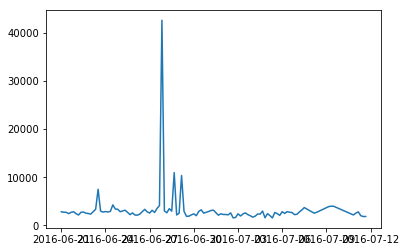

In [40]:
#test time series plot on matplotlib
x1 = sensor1["dt"]
y1 = sensor1["con"]


plt.plot(x1,y1)
plt.show()

In the following plots, I visualize the data from each sensor

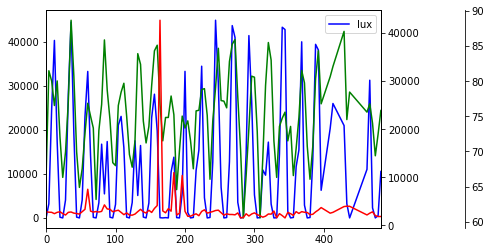

In [41]:
#Sensor 1 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


sensor1.lux.plot(ax=ax, style='b-')
sensor1.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor1.spl.plot(ax=ax3, style='g-')
ax.legend(loc=1)


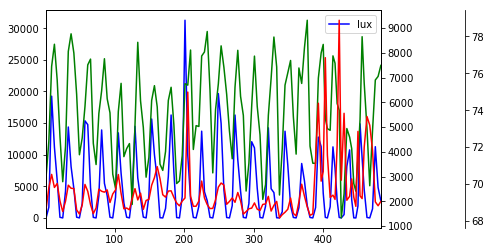

In [42]:
#Sensor 2 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor2.lux.plot(ax=ax, style='b-')
sensor2.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor2.spl.plot(ax=ax3, style='g-')
ax.legend(loc=1)

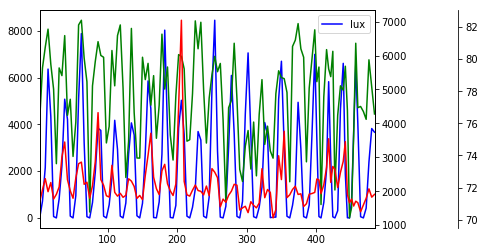

In [43]:
#Sensor 3 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor3.lux.plot(ax=ax, style='b-')
sensor3.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor3.spl.plot(ax=ax3, style='g-')
ax.legend(loc=1)

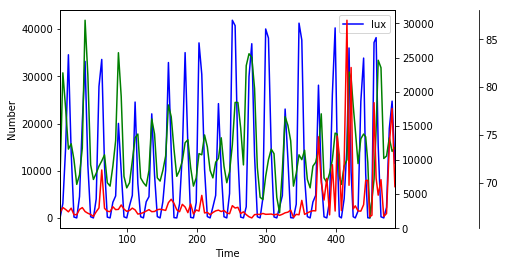

In [44]:
#Sensor 4 values plotted
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)



sensor4.lux.plot(ax=ax, style='b-')
sensor4.con.plot(ax=ax2, style='r-', secondary_y=True)
sensor4.spl.plot(ax=ax3, style='g-')

ax.set_xlabel("Time")
ax.set_ylabel(r"Number")



ax.legend(loc=1)

In [45]:
#find the averages for each of the four sensors for each measured variable
#(sensor1["con"] * sensor2["con"] * sensor3["con"] * sensor4["con"])/4

In [46]:
#rename column names for clarity
sensor1 = sensor1.rename(columns={'lux': 'lux1', 'con': 'con1','spl': 'spl1'})
sensor2 = sensor2.rename(columns={'lux': 'lux2', 'con': 'con2','spl': 'spl2'})
sensor3 = sensor3.rename(columns={'lux': 'lux3', 'con': 'con3','spl': 'spl3'})
sensor4 = sensor4.rename(columns={'lux': 'lux4', 'con': 'con4','spl': 'spl4'})



In [47]:
#merge columns into same dataframe
merged = pd.merge(sensor1, sensor2, on='dt')
merged2 = pd.merge(sensor3, sensor4, on='dt')
merged3 = pd.merge(merged, merged2, on='dt')

In [48]:
#mage dt index for plotting
merged3 = merged3.set_index('dt')

In [49]:

#change Dt to date time format for plotting
sensordata["dt"] = pd.to_datetime(sensordata['dt'])
# convert numeric columns to numeric
sensordata['con'] = pd.to_numeric(sensordata['con'], errors='ignore')
sensordata['lux'] = pd.to_numeric(sensordata['lux'], errors='ignore')
sensordata['spl'] = pd.to_numeric(sensordata['spl'], errors='ignore')

#create totals column
merged3["lighttotal"] =  merged3["lux1"] + merged3["lux2"] + merged3["lux3"] + merged3["lux4"]
merged3["soundpressuretotal"] =  merged3["spl1"] + merged3["spl2"] + merged3["spl3"] + merged3["spl4"]
merged3["particledensitytotal"] =  merged3["con1"] + merged3["con2"] + merged3["con3"] + merged3["con4"]


In [50]:
merged3.head()

,sensor_x_x,lux1,con1,spl1,sensor_y_x,lux2,con2,spl2,sensor_x_y,lux3,con3,spl3,sensor_y_y,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal
dt,,,,,,,,,,,,,,,,,,,
2016-06-21 00:00:00,sensor_0,0.000,2834.03125,66.308479,sensor_2,0.000,1691.99625,70.375943,sensor_3,0.000,1686.44125,76.235738,sensor_4,0.000,2324.65875,70.652334,0.000,283.572494,8537.12750
2016-06-21 04:00:00,sensor_0,3213.500,2748.28875,81.467436,sensor_2,1703.000,2550.94500,72.334450,sensor_3,712.500,2041.33000,79.445869,sensor_4,3057.750,3041.73875,81.499422,8686.750,314.747178,10382.30250
2016-06-21 08:00:00,sensor_0,24532.625,2720.35125,80.020600,sensor_2,19257.500,3088.82750,76.372047,sensor_3,2152.875,2369.71750,80.738609,sensor_4,14859.000,2757.67250,77.785565,60802.000,314.916821,10936.56875
2016-06-21 12:00:00,sensor_0,40268.250,2443.72875,76.525876,sensor_2,11213.125,2561.64625,77.571715,sensor_3,6361.500,1985.25625,81.861684,sensor_4,34566.500,2409.32625,73.503135,92409.375,309.462410,9399.95750
2016-06-21 16:00:00,sensor_0,17189.750,2717.49625,80.020600,sensor_2,5939.250,2721.79125,75.635837,sensor_3,4337.125,2255.37750,79.675113,sensor_4,13819.375,2944.80375,74.061797,41285.500,309.393347,10639.46875


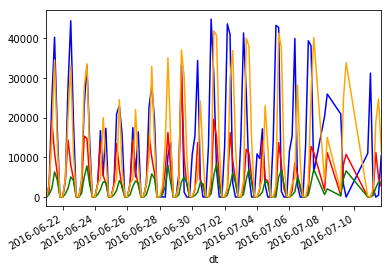

In [51]:
#Plot all Lux
merged3["lux1"].plot(label="sensor 1", style='blue')
merged3["lux2"].plot(label="sensor 2", style='red')
merged3["lux3"].plot(label="sensor 3", style='green')
merged3["lux4"].plot(label="sensor 4", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold -52902.9
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


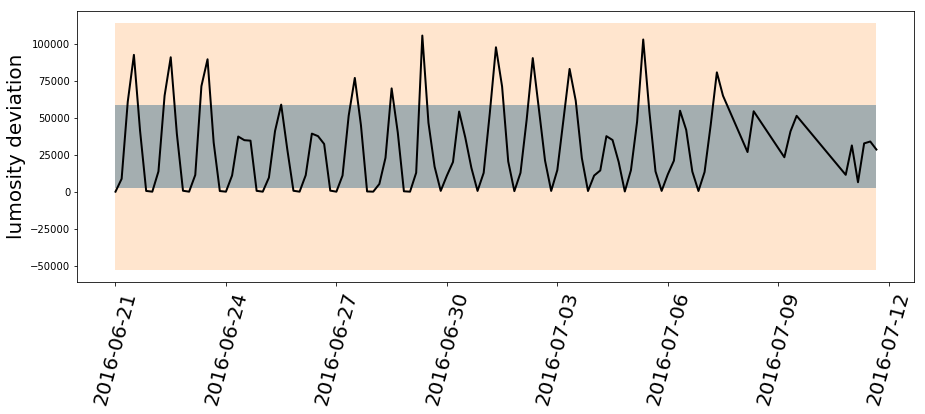

In [52]:
rng = merged3.index
mta_allsum = merged3["lighttotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("lumosity deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted

Lumosity abnormal behavior: 7.10 & 7.11

It appears that the 

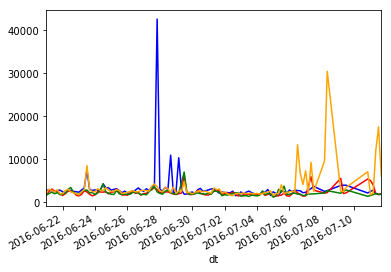

In [53]:
#plot all con
merged3["con1"].plot(label="sensor 1", style='blue')
merged3["con2"].plot(label="sensor 1", style='red')
merged3["con3"].plot(label="sensor 1", style='green')
merged3["con4"].plot(label="sensor 1", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold -5902.7
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


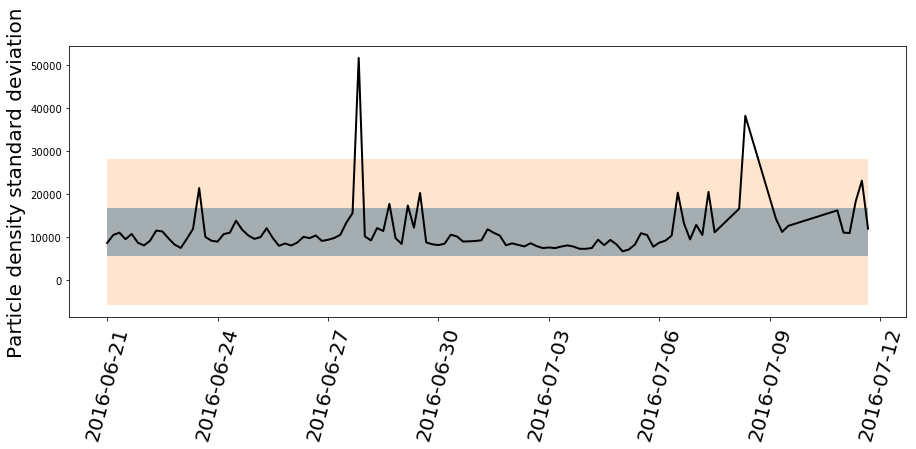

In [54]:
rng = merged3.index
mta_allsum = merged3["particledensitytotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("Particle density standard deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted

Partice density irregularities: 6.27 & 7.8

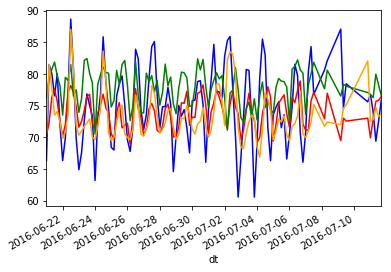

In [55]:
#plot all spl
merged3["spl1"].plot(label="sensor 1", style='blue')
merged3["spl2"].plot(label="sensor 1", style='red')
merged3["spl3"].plot(label="sensor 1", style='green')
merged3["spl4"].plot(label="sensor 1", style='orange')
ax.legend(loc=1)

plt.plot()
plt.show()

3 sigma threshold 265.6
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', name=u'dt', freq=None))


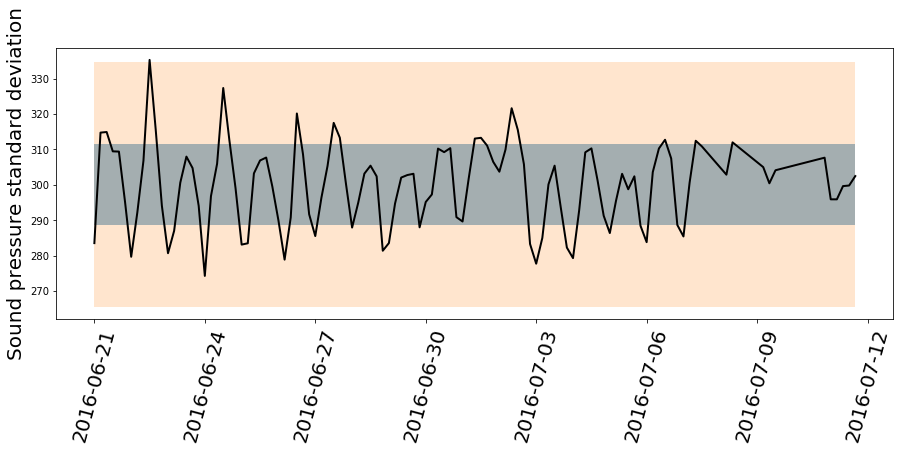

In [56]:
lightindex = merged3.index
mta_allsum = merged3["soundpressuretotal"]

pl.figure(figsize=(15,5))
pl.plot(rng, mta_allsum, 'k-', lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("Sound pressure standard deviation", fontsize=20)  
onesig = np.std(mta_allsum)
tsthresh = np.nanmean(mta_allsum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(mta_allsum < tsthresh))
print ("outlier date", rng[np.where(mta_allsum < tsthresh)])
pl.fill_between(rng, np.nanmean(mta_allsum) - onesig,
                np.nanmean(mta_allsum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(mta_allsum) - 3 * onesig,
                 np.nanmean(mta_allsum) + 3 * onesig, alpha = 0.2)
#pl.fill_between(weighted +threesigma(weighted , 10), weighted -threesigma(weighted

Sound pressure irregularitiy 6 22

    Import additional datasets for comparison

In [57]:
#weather data

html = urlopen("https://www.wunderground.com/history/airport/KJRB/2016/6/21/CustomHistory.html?dayend=17&monthend=7&yearend=2016&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=")

bs = BeautifulSoup(html,"lxml")

weathertable = bs.find("table",{"id":"obsTable"})




In [58]:
weatherdata = pd.read_csv("https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/weatherdata.csv")


In [59]:
weatherdata["DT"] = pd.to_datetime(weatherdata['DT'])

In [60]:
weatherdata2 = weatherdata.set_index('DT')
weatherdata2.head()

,Temp Avg,Humidity Avg
DT,,
2016-06-21,80,48
2016-06-22,78,40
2016-06-23,74,60
2016-06-24,76,64
2016-06-25,74,64


In [65]:
merged3.head(100)

,sensor_x_x,lux1,con1,spl1,sensor_y_x,lux2,con2,spl2,sensor_x_y,lux3,con3,spl3,sensor_y_y,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal
dt,,,,,,,,,,,,,,,,,,,
2016-06-21 00:00:00,sensor_0,0.000,2834.03125,66.308479,sensor_2,0.000,1691.99625,70.375943,sensor_3,0.000,1686.44125,76.235738,sensor_4,0.000,2324.65875,70.652334,0.000,283.572494,8537.12750
2016-06-21 04:00:00,sensor_0,3213.500,2748.28875,81.467436,sensor_2,1703.000,2550.94500,72.334450,sensor_3,712.500,2041.33000,79.445869,sensor_4,3057.750,3041.73875,81.499422,8686.750,314.747178,10382.30250
2016-06-21 08:00:00,sensor_0,24532.625,2720.35125,80.020600,sensor_2,19257.500,3088.82750,76.372047,sensor_3,2152.875,2369.71750,80.738609,sensor_4,14859.000,2757.67250,77.785565,60802.000,314.916821,10936.56875
2016-06-21 12:00:00,sensor_0,40268.250,2443.72875,76.525876,sensor_2,11213.125,2561.64625,77.571715,sensor_3,6361.500,1985.25625,81.861684,sensor_4,34566.500,2409.32625,73.503135,92409.375,309.462410,9399.95750
2016-06-21 16:00:00,sensor_0,17189.750,2717.49625,80.020600,sensor_2,5939.250,2721.79125,75.635837,sensor_3,4337.125,2255.37750,79.675113,sensor_4,13819.375,2944.80375,74.061797,41285.500,309.393347,10639.46875
2016-06-21 20:00:00,sensor_0,157.750,2839.57500,72.061800,sensor_2,94.000,2011.69375,72.578652,sensor_3,59.125,1768.38500,78.128385,sensor_4,190.750,1992.24000,72.394740,501.625,295.163576,8611.89375
2016-06-22 00:00:00,sensor_0,0.000,2451.52875,66.308479,sensor_2,0.000,1588.41375,70.126999,sensor_3,0.000,1907.69750,73.484310,sensor_4,0.000,1999.24125,69.804451,0.000,279.724239,7946.88125
2016-06-22 04:00:00,sensor_0,4075.875,2161.75000,69.917600,sensor_2,4251.125,2007.69250,72.039572,sensor_3,816.375,2125.37125,79.445474,sensor_4,4537.500,2763.72125,70.811931,13680.875,292.214578,9058.53500
2016-06-22 08:00:00,sensor_0,27930.750,2714.79750,77.076297,sensor_2,14378.000,2652.43875,77.184614,sensor_3,2226.375,3012.77750,78.968333,sensor_4,20280.000,3028.19250,73.616749,64815.125,306.845994,11408.20625


In [67]:
#get daily averages
merged4 = merged3.groupby([merged3.index.day]).mean()
merged4.head(50)

,lux1,con1,spl1,lux2,con2,spl2,lux3,con3,spl3,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal
1,15848.208333,2719.527917,78.100100,6890.375000,2271.516667,74.789994,2956.375000,2196.489167,78.412299,16844.083333,2648.767292,74.593321,42539.041667,305.895713,9836.301042
2,16828.458333,2092.650000,77.079778,5289.354167,1993.516042,74.198430,2216.437500,1949.688125,76.701688,13769.937500,1942.562500,78.689737,38104.187500,306.669633,7978.416667
3,14612.104167,2265.565417,72.420709,5027.020833,1710.155833,73.126903,2633.937500,1523.909583,74.141239,16167.125000,2060.306667,71.040274,38440.187500,290.729125,7559.937500
4,6826.500000,2153.868333,75.779426,4125.645833,1902.994167,73.816153,1571.437500,1940.084792,75.463319,7105.979167,2218.081875,72.305030,19629.562500,297.363928,8215.029167
5,17011.808333,2209.447042,72.581693,4179.312500,1613.042500,73.840152,2493.166667,2271.372708,77.748638,15140.875000,2333.117708,71.600942,38825.162500,295.771425,8426.979958
6,11660.375000,2642.387917,73.882722,3010.895833,1917.660000,75.278756,1639.708333,1910.790625,79.546136,7535.333333,5303.462292,72.393008,23846.312500,301.100622,11774.300833
7,24262.906250,3007.444062,78.039024,6426.906250,3498.870313,73.770336,2778.875000,1859.134063,78.404524,17514.531250,5280.260625,72.131082,50983.218750,302.344966,13645.709062
8,23121.535715,2630.952262,81.346856,6495.187500,2204.847500,74.926791,1366.062500,2445.756250,79.113199,9558.250000,20037.188750,72.053186,40541.035715,307.440032,27318.744762
9,8057.291667,3959.484722,80.009268,6479.625000,3268.624583,71.673337,3857.625000,2514.599167,77.628455,20013.083333,2835.850833,73.885610,38407.625000,303.196670,12578.559306
10,11020.875000,2173.723750,75.583625,67.125000,5429.006250,73.009035,52.000000,1393.295000,77.045967,238.000000,7121.718750,82.036768,11378.000000,307.675394,16117.743750


In [62]:
merged5 = merged4.merge(weatherdata2, how='outer', left_index=True, right_index=True)

In [63]:
merged5.head()

,lux1,con1,spl1,lux2,con2,spl2,lux3,con3,spl3,lux4,con4,spl4,lighttotal,soundpressuretotal,particledensitytotal,Temp Avg,Humidity Avg
2016-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,48.0
2016-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,40.0
2016-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,60.0
2016-06-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,64.0
2016-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,64.0


In [ ]:
#new particle dataframe
new = merged3(['dt','particledensitytotal'])


In [ ]:
merged3.corr(weatherdata2)

In [ ]:

stats.pearsonr(Y, Z)

In [74]:
particles = merged4["particledensitytotal"]
temavg = weatherdata2["Temp Avg"]
humavg = weatherdata2["Humidity Avg"]

In [73]:
stats.pearsonr(particles, temavg)

(-0.20146602551849407, 0.38117673258082141)

In [75]:
stats.pearsonr(particles, humavg)

(0.64677807461510395, 0.001531916769541372)

Above is the findings of the spearmans test 